In [1]:
from eicvibe.machine_portal.bend import Bend
from eicvibe.machine_portal.drift import Drift
from eicvibe.machine_portal.quadrupole import Quadrupole
from eicvibe.machine_portal.parameter_group import ParameterGroup   
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import yaml

In [7]:
d1= Drift(name="Drift1", length=1.0)
b1= Bend(name="Bend1", length=2.0)
b2= Bend(name="Bend2", length=2.0)
qf= Quadrupole(name="Quad1", length=0.6)
qd= Quadrupole(name="Quad2", length=0.6)


b1.add_parameter("BendP", "ANGLE", np.pi/20)
b2.add_parameter("BendP", "ANGLE", np.pi/20)


qf.add_parameter("MagneticMultipoleP", "K1", 1.2)
qd.add_parameter("MagneticMultipoleP", "K1", -1.2)


qf.add_parameter("ApertureP", "X", [-0.05,0.05])




In [12]:
yaml_str = '''
Quadrupole:
  length: 1.0
  MagneticMultipoleP:
    Kn1: -1.0'''

yaml_dict = yaml.safe_load(yaml_str)
print(yaml.safe_dump(qf.to_yaml_dict(), default_flow_style=False, sort_keys=False))

Quadrupole:
  name: Quad1
  length: 0.6
  MagneticMultipoleP:
    K1: 1.2
  ApertureP:
    X:
    - -0.05
    - 0.05



(-1.0, 1.0)

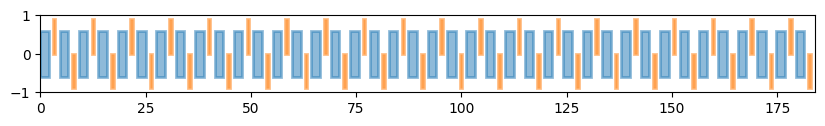

In [5]:
fig, ax = plt.subplots(figsize=(10, 1))
cell = [b1, d1, qf, d1, b2, d1, qd, d1]
ring = cell * 20
sloc=0.0
for element in ring:
    #print(element.name, element.type, element.length, sloc)
    sloc=element.plot_in_beamline(ax, sloc, normalized_strength=None)

ax.set_xlim(0, sloc)
ax.set_ylim(-1, 1)


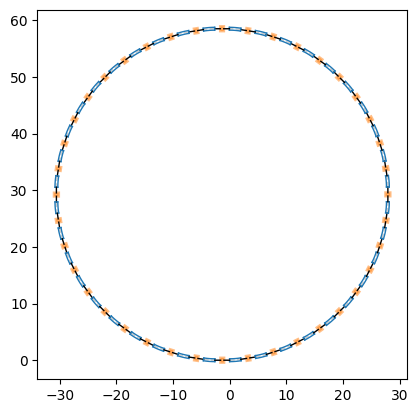

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
initial_xy = [0, 0]
initial_vector = [np.cos(np.pi/5000),np.sin(np.pi/5000)]  
for element in ring:
    initial_xy, initial_vector=element.plot_in_floorplan(ax, initial_xy, initial_vector)